# Основные Импорты

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('resources/Billionaires Statistics Dataset.csv')

# Пункт - 1. Типы и роли данных (1 балл)

## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [5]:
# Исследование структуры данных
print("Размерность данных:", df.shape)
print("\nПервые 5 строк:")
print(df.head())

print("\nИнформация о типах данных:")
print(df.info())

print("\nСтатистическое описание числовых переменных:")
print(df.describe())

print("\nСтатистическое описание категориальных переменных:")
print(df.describe(include=['object']))

# Анализ пропущенных значений
print("\nПропущенные значения:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Размерность данных: (2640, 35)

Первые 5 строк:
   rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship  ... cpi_change_country          

## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

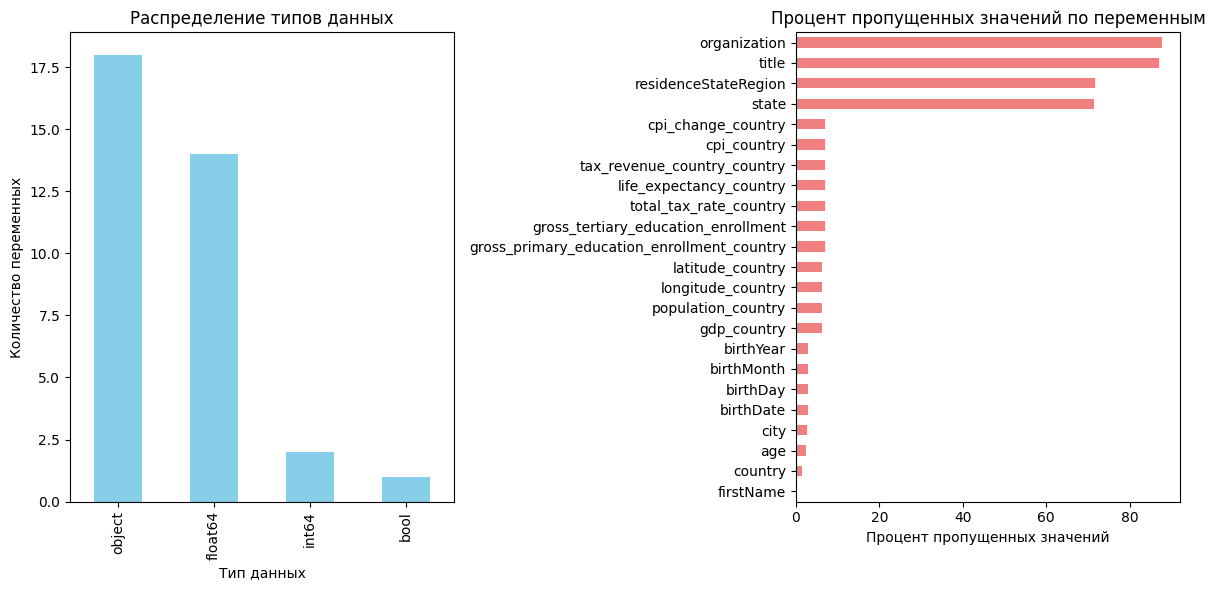

In [6]:
# Визуализация распределения типов данных
plt.figure(figsize=(12, 6))

# Количество переменных по типам
dtype_counts = df.dtypes.value_counts()
plt.subplot(1, 2, 1)
dtype_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение типов данных')
plt.xlabel('Тип данных')
plt.ylabel('Количество переменных')

# Процент пропущенных значений
plt.subplot(1, 2, 2)
missing_percent = (df.isnull().sum() / len(df) * 100)
missing_percent = missing_percent[missing_percent > 0]
missing_percent.sort_values(ascending=True).plot(kind='barh', color='lightcoral')
plt.title('Процент пропущенных значений по переменным')
plt.xlabel('Процент пропущенных значений')

plt.tight_layout()
plt.show()

# Пункт - 2. Пропущенные значения (1 балл)

## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [7]:
# Анализ пропущенных значений
print("=== ОБЩИЙ АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===")
print(f"Общее количество строк: {len(df)}")
print(f"Общее количество пропущенных значений: {df.isnull().sum().sum()}")
print(f"Процент пропущенных значений в наборе данных: {(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%")

# Детальный анализ по колонкам
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print("\n=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ПО КОЛОНКАМ ===")
missing_info = pd.DataFrame({
    'Колонка': missing_data.index,
    'Пропущено': missing_data.values,
    'Процент': missing_percent.values
})
missing_info = missing_info[missing_info['Пропущено'] > 0].sort_values('Процент', ascending=False)
print(missing_info)

=== ОБЩИЙ АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===
Общее количество строк: 2640
Общее количество пропущенных значений: 10812
Процент пропущенных значений в наборе данных: 11.70%

=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ПО КОЛОНКАМ ===
                                       Колонка  Пропущено    Процент
10                                organization       2315  87.689394
17                                       title       2301  87.159091
20                        residenceStateRegion       1893  71.704545
19                                       state       1887  71.477273
25                          cpi_change_country        184   6.969697
24                                 cpi_country        184   6.969697
30                 tax_revenue_country_country        183   6.931818
27         gross_tertiary_education_enrollment        182   6.893939
31                      total_tax_rate_country        182   6.893939
29                     life_expectancy_country        182   6.893939
28  gross_primary_education_en

## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

In [ ]:
# Визуализация пропущенных значений
plt.figure(figsize=(15, 10))

# Heatmap пропущенных значений
plt.subplot(2, 2, 1)
missing_matrix = df.isnull()
sns.heatmap(missing_matrix, cbar=True, yticklabels=False, cmap='viridis')
plt.title('Матрица пропущенных значений (Heatmap)')
plt.xlabel('Колонки')
plt.ylabel('Строки')

# Процент пропущенных значений по колонкам
plt.subplot(2, 2, 2)
top_missing = missing_info.head(15)
plt.barh(top_missing['Колонка'], top_missing['Процент'], color='coral')
plt.title('Топ-15 колонок с наибольшим % пропусков')
plt.xlabel('Процент пропусков (%)')
plt.gca().invert_yaxis()

# Распределение количества пропусков по строкам
plt.subplot(2, 2, 3)
missing_per_row = df.isnull().sum(axis=1)
plt.hist(missing_per_row, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Распределение пропусков по строкам')
plt.xlabel('Количество пропусков в строке')
plt.ylabel('Количество строк')

# Распределение количества пропусков по колонкам
plt.subplot(2, 2, 4)
missing_per_col = df.isnull().sum()
plt.hist(missing_per_col, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Распределение пропусков по колонкам')
plt.xlabel('Количество пропусков в колонке')
plt.ylabel('Количество колонок')

plt.tight_layout()
plt.show()

# Пункт - 3 - Сводные показатели (2 балла)



## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [ ]:
# Здесь код решения

## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

In [ ]:
# Здесь код подготовки ответа и сам ответ

# Пункт - 4. Анализ связей показателей (2 балла)

## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [ ]:
# Здесь код решения

## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

In [ ]:
# Здесь код подготовки ответа и сам ответ

# Пункт - 5.  Многомерный анализ (2 балла)

## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [ ]:
# Здесь код решения

## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

In [ ]:
# Здесь код подготовки ответа и сам ответ